Importing Neccesary Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")


Loading The Dataset

In [8]:
#data is loaded in to the "data " from the excel file
data = pd.read_excel("/content/Online Retail.xlsx")

Performing Exploratory Data Analysis (EDA)

In [9]:
#give information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [10]:
#shows top 5 values
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [11]:
#describe the mathamethical values of the data
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [12]:
#shows the data shape
data.shape

(541909, 8)

In [13]:
#Shows Missing Values
print("Missing values before cleaning:")
print(data.isnull().sum())

Missing values before cleaning:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [14]:
#drops the subset which contains Missing values
data = data.dropna(subset=["CustomerID"])

In [15]:
print("\nMissing values after cleaning:")
print(data.isnull().sum())


Missing values after cleaning:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [16]:
#shows sum of null values
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [17]:
#droping the duplicate values
data = data.drop_duplicates()

In [18]:
data.duplicated().sum()

np.int64(0)

In [19]:
#Handling negative values
data = data[data['Quantity'] > 0]
data = data[data['UnitPrice'] >= 0]

In [20]:
#shows the sum of unique "customerid"
data["CustomerID"].nunique()

4339

In [21]:
#shows the sum of unique "Stockcode"
data["StockCode"].nunique()

3665

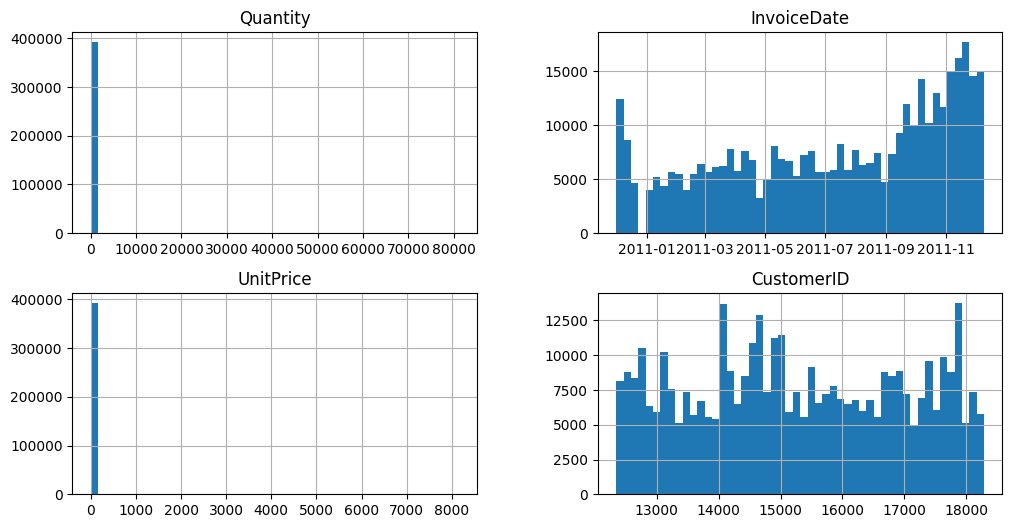

In [22]:
#basic visualization
data.hist(figsize=(12, 6), bins=50)
plt.show()

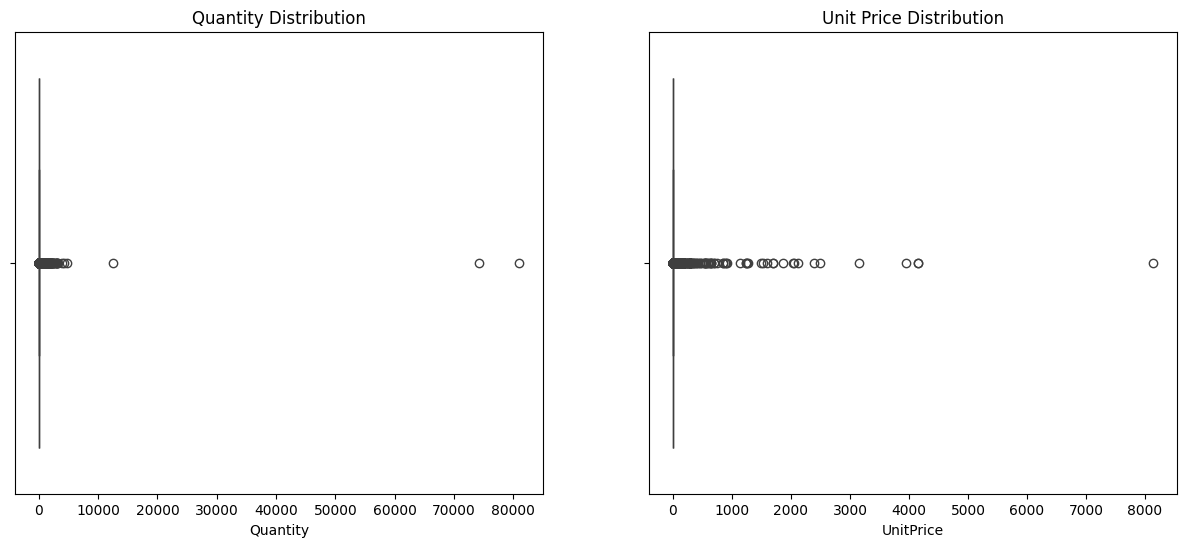

In [23]:
# Outlier Detection
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.boxplot(x=data['Quantity'], ax=ax[0])
ax[0].set_title('Quantity Distribution')
sns.boxplot(x=data['UnitPrice'], ax=ax[1])
ax[1].set_title('Unit Price Distribution')
plt.show()


In [24]:
data["Amount_Spent"] = data["Quantity"] * data["UnitPrice"]
print(data["Amount_Spent"])

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: Amount_Spent, Length: 392732, dtype: float64


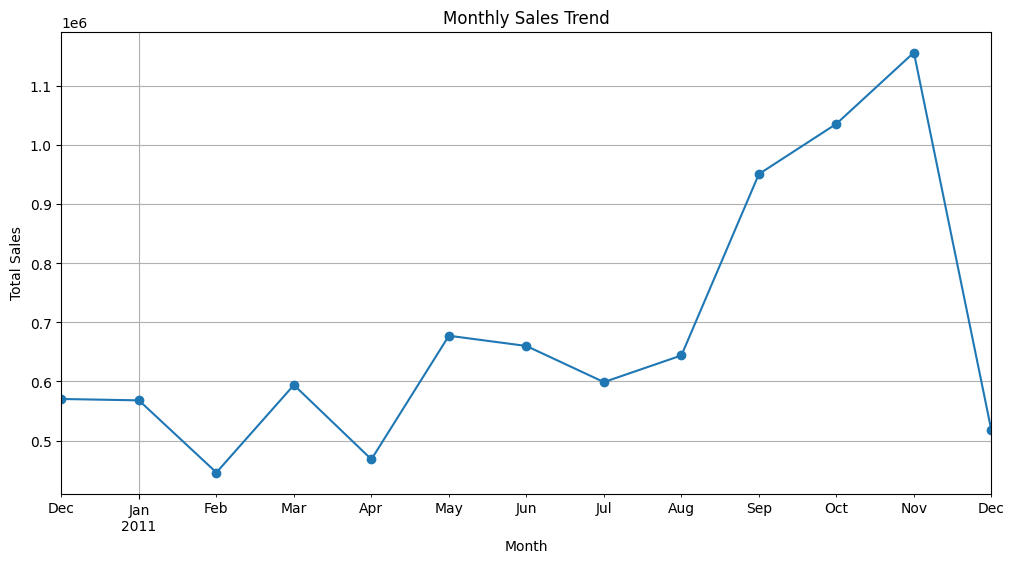

In [25]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['InvoiceYearMonth'] = data['InvoiceDate'].dt.to_period('M')
monthly_sales = data.groupby('InvoiceYearMonth')['Amount_Spent'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [26]:
top_products = data["StockCode"].value_counts().head(10)
print( top_products)

StockCode
85123A    2023
22423     1714
85099B    1615
84879     1395
47566     1390
20725     1304
22720     1152
POST      1099
23203     1091
20727     1078
Name: count, dtype: int64


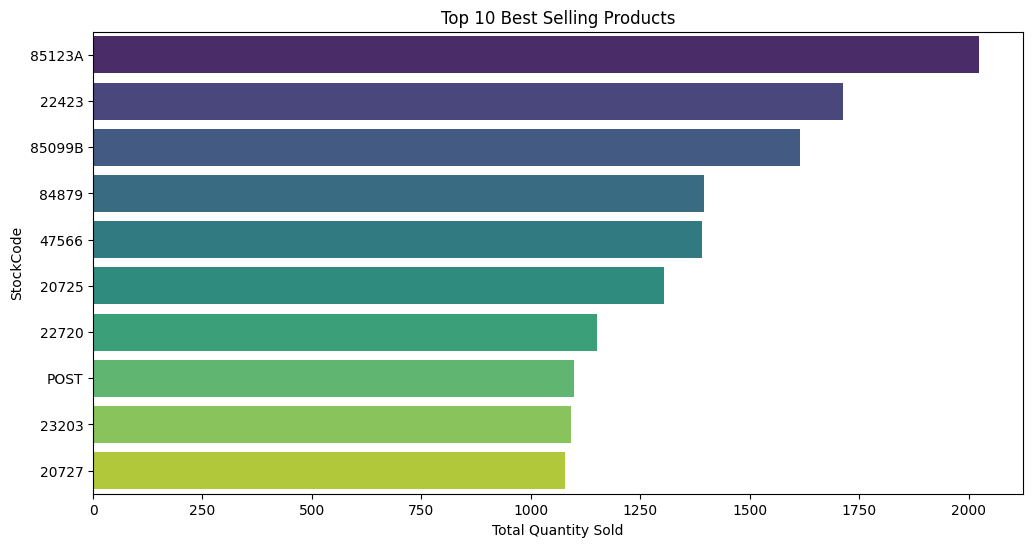

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Best Selling Products')
plt.xlabel('Total Quantity Sold')
plt.show()


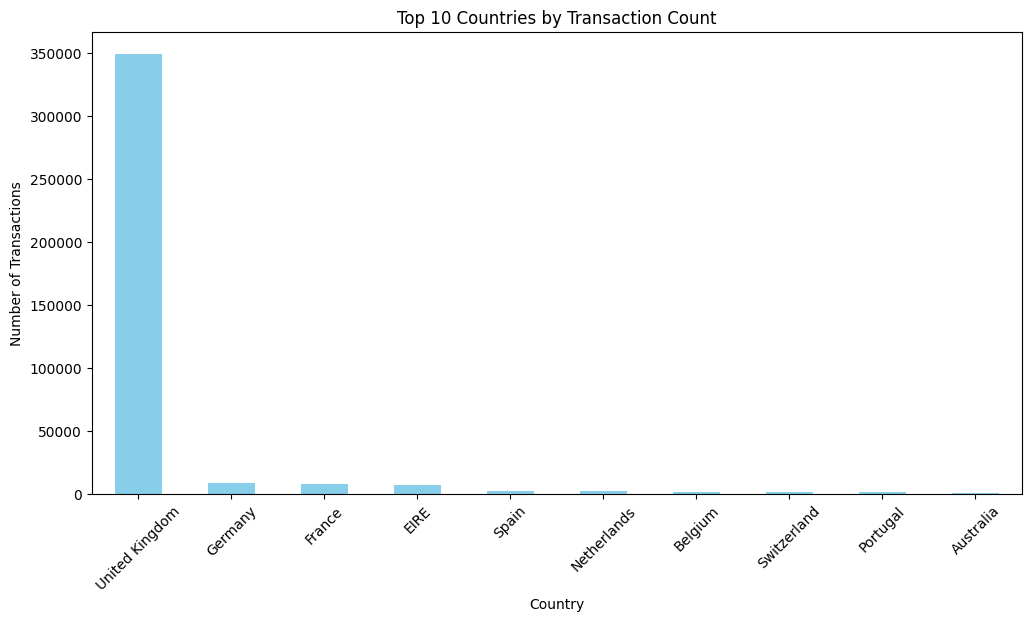

In [28]:
plt.figure(figsize=(12, 6))
data['Country'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Transaction Count')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

Feature Engineering, RFM(RECENCY , FREQUENCY, MONETARY )

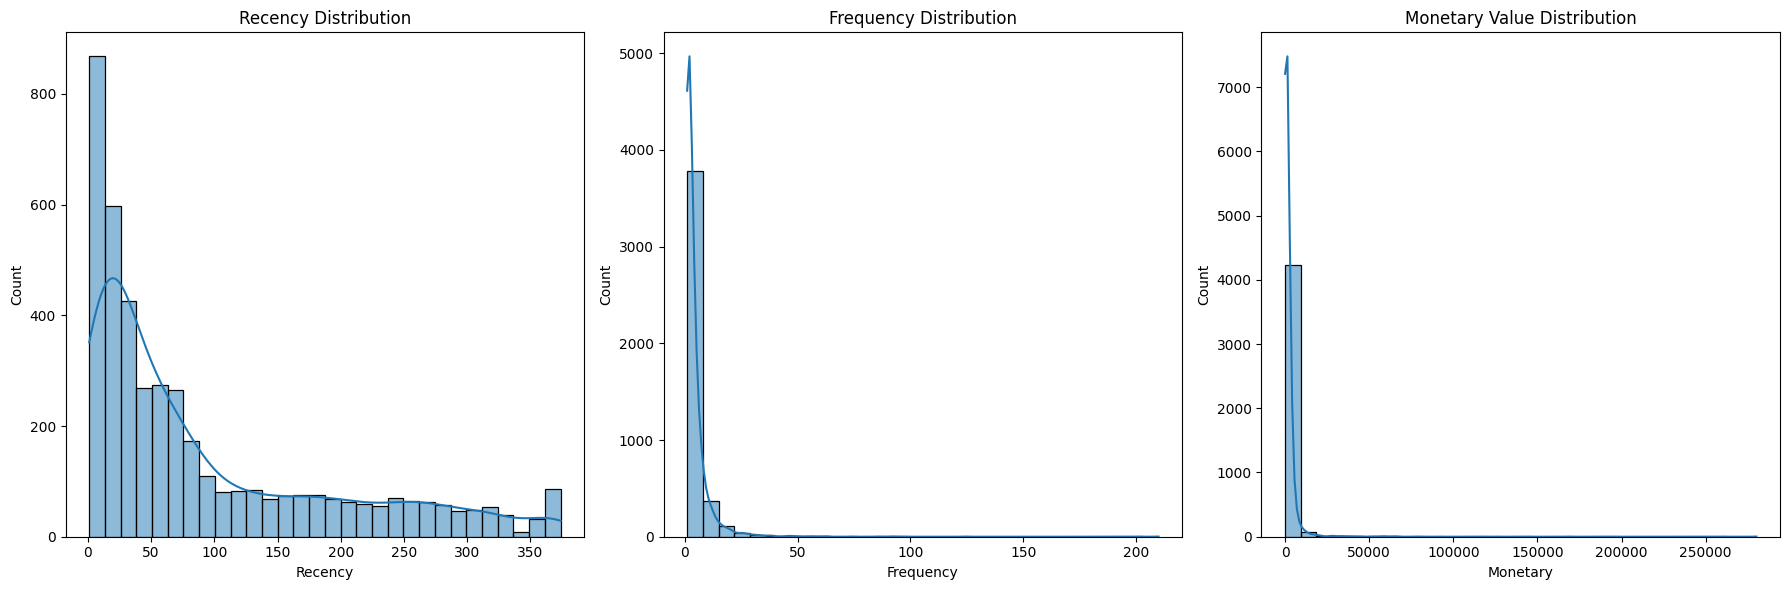

In [29]:

data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
snapshot_date = data['InvoiceDate'].max() + pd.DateOffset(days=1)

rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
})

# RFM Distribution Plots
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
sns.histplot(rfm['Recency'], bins=30, kde=True, ax=ax[0])
ax[0].set_title('Recency Distribution')
sns.histplot(rfm['Frequency'], bins=30, kde=True, ax=ax[1])
ax[1].set_title('Frequency Distribution')
sns.histplot(rfm['Monetary'], bins=30, kde=True, ax=ax[2])
ax[2].set_title('Monetary Value Distribution')
plt.tight_layout()
plt.show()

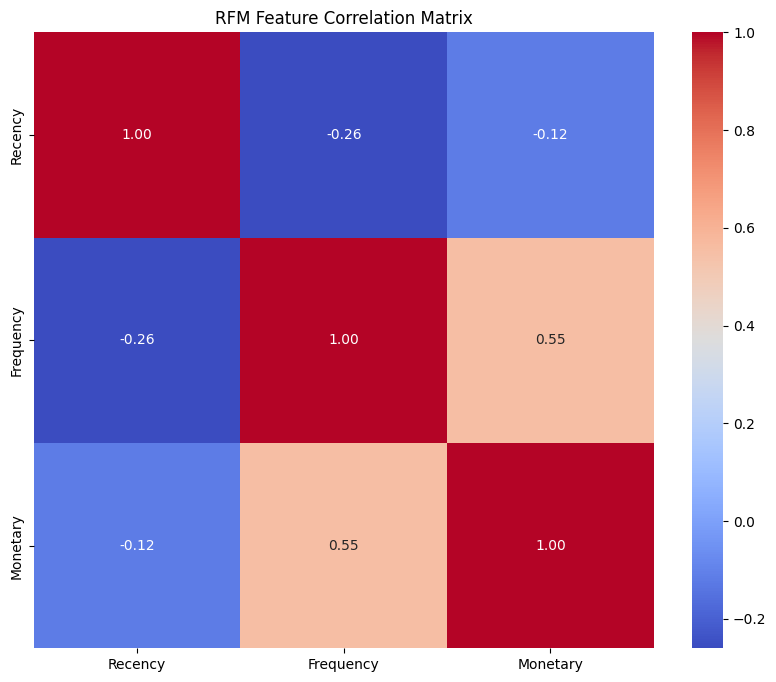

In [30]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(rfm.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('RFM Feature Correlation Matrix')
plt.show()

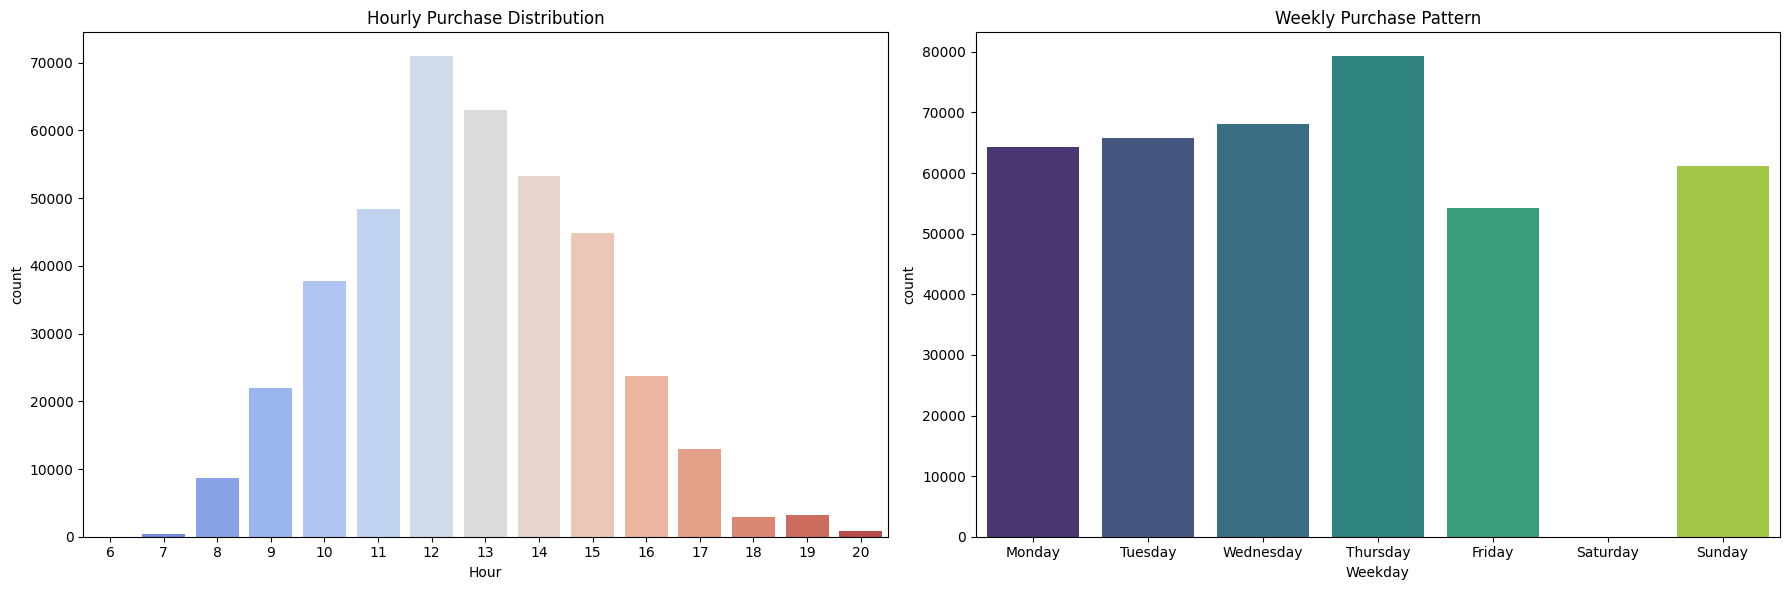

In [31]:
#  Purchase Pattern Analysis
data['Hour'] = data['InvoiceDate'].dt.hour
data['Weekday'] = data['InvoiceDate'].dt.day_name()

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Hour', data=data, palette='coolwarm')
plt.title('Hourly Purchase Distribution')

plt.subplot(1, 2, 2)
sns.countplot(x='Weekday', data=data, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='viridis')
plt.title('Weekly Purchase Pattern')
plt.tight_layout()
plt.show()


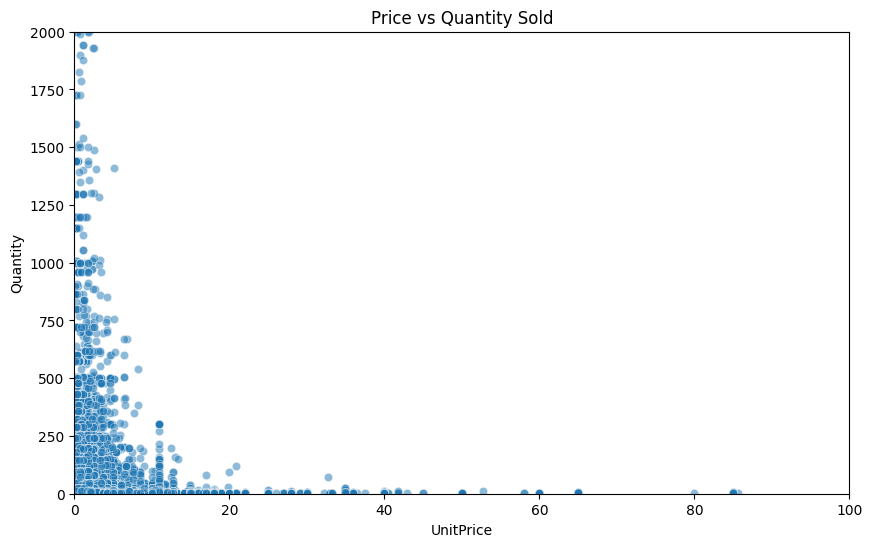

In [32]:
#  Price-Quantity Relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='UnitPrice', y='Quantity', data=data, alpha=0.5)
plt.title('Price vs Quantity Sold')
plt.xlim(0, 100)
plt.ylim(0, 2000)
plt.show()

In [33]:

#  Customer Behavior Features
customer_features = data.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',  # Purchase frequency
    'TotalPrice': 'sum',     # Monetary value
    'InvoiceDate': lambda x: (x.max() - x.min()).days,  # Tenure
    'Quantity': 'mean',      # Average basket size
    'StockCode': 'nunique'   # Product variety
}).rename(columns={
    'InvoiceNo': 'PurchaseFrequency',
    'TotalPrice': 'TotalSpend',
    'InvoiceDate': 'CustomerTenure',
    'Quantity': 'AvgBasketSize',
    'StockCode': 'UniqueProducts'
})

#  Product Popularity Features
product_features = data.groupby('StockCode').agg({
    'Quantity': ['sum', 'mean'],  # Total sold & avg per transaction
    'CustomerID': 'nunique',      # Popularity
    'UnitPrice': 'mean'
}).reset_index()
product_features.columns = ['StockCode', 'TotalSold', 'AvgPerTransaction', 'UniqueCustomers', 'AvgPrice']

#  Time-Based Features
data['DaysSinceLastPurchase'] = (data.groupby('CustomerID')['InvoiceDate'].transform('max') - data['InvoiceDate']).dt.days
data['PurchaseVelocity'] = data.groupby('CustomerID')['InvoiceNo'].transform('count') / data.groupby('CustomerID')['InvoiceDate'].transform('nunique')








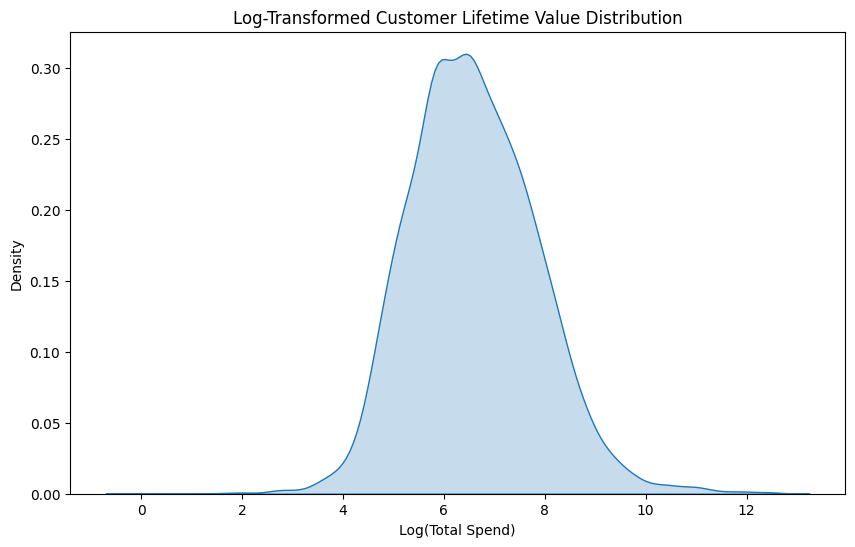

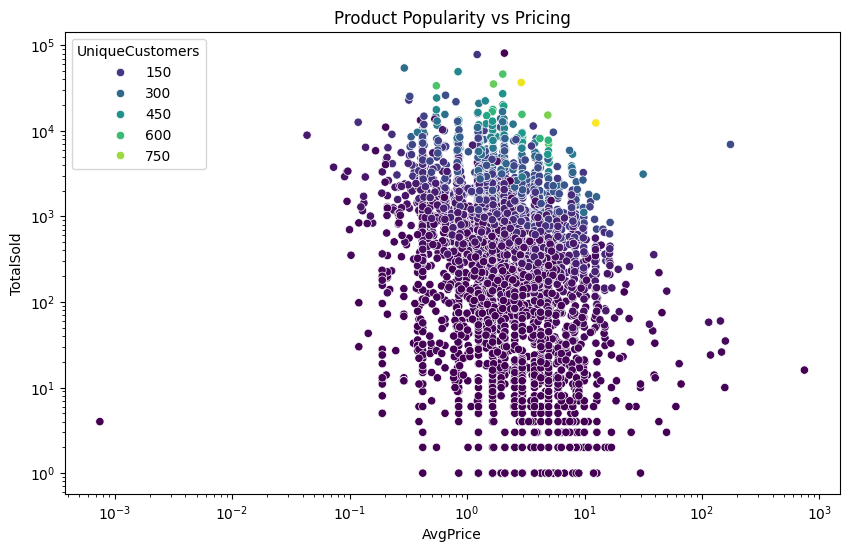

In [34]:
#  Customer Lifetime Value Distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(np.log1p(customer_features['TotalSpend']), fill=True)
plt.title('Log-Transformed Customer Lifetime Value Distribution')
plt.xlabel('Log(Total Spend)')
plt.show()

#  Product Popularity vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AvgPrice', y='TotalSold', data=product_features, hue='UniqueCustomers', palette='viridis')
plt.title('Product Popularity vs Pricing')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [35]:
# Calculating the  Recency, Frequency, Monetary
snapshot_date = data['InvoiceDate'].max() + pd.DateOffset(days=1)
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                   # Frequency
    'UnitPrice': 'sum'                                        # Monetary
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'UnitPrice': 'Monetary'})

Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

In [37]:
rfm_scaled

array([[ 2.33485829, -0.42467487, -0.32201021],
       [-0.90519931,  0.35408019,  0.22655054],
       [-0.17518634, -0.03529734, -0.11903463],
       ...,
       [-0.84519825, -0.29488236, -0.25192212],
       [-0.88519896,  1.52221279,  1.01839182],
       [-0.49519203, -0.16508985, -0.20375726]])

K MEANS(ELBOW METHOD)

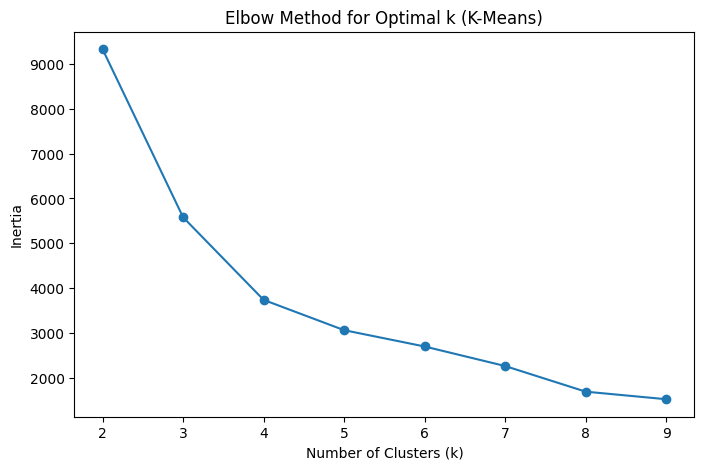

In [38]:
from sklearn.cluster import KMeans

# Calculate inertia for different k values
inertia = []
k_values = range(2, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k (K-Means)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.show()

In [40]:
from sklearn.cluster import KMeans

# Optimal Number of clusters are determined from the elbow method
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(rfm_scaled)
rfm['Cluster_KMeans'] = kmeans.labels_

<Axes: xlabel='Monetary', ylabel='Frequency'>

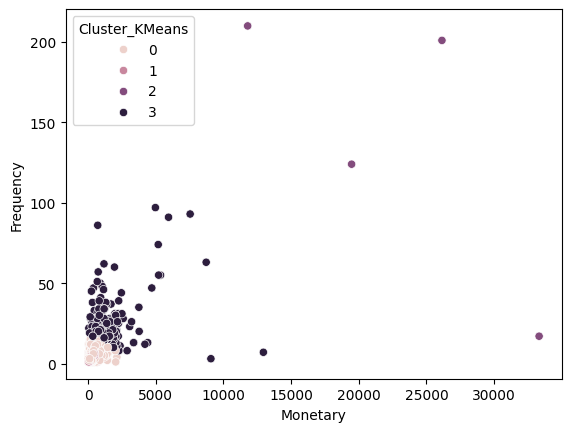

In [ ]:
# visualize the clusters
sns.scatterplot(data=rfm, x='Monetary', y='Frequency', hue='Cluster_KMeans')

In [42]:
# Merge clusters with transaction data
data_clustered = data.merge(rfm[['Cluster_KMeans']], on='CustomerID')

# to Get top 5 products per cluster (exclude items already purchased by the customer)
def recommend_products(customer_id, n=5):
    cluster = rfm.loc[customer_id, 'Cluster_KMeans']
    customer_purchases = data[data['CustomerID'] == customer_id]['StockCode'].unique()
    cluster_products = data_clustered[data_clustered['Cluster_KMeans'] == cluster]
    top_products = cluster_products[~cluster_products['StockCode'].isin(customer_purchases)]
    top_products = top_products.groupby('StockCode')['Quantity'].sum().nlargest(n).reset_index()
    return top_products.merge(data[['StockCode', 'Description']].drop_duplicates(), on='StockCode')

In [43]:
recommend_products(17850, n=5)

,StockCode,Quantity,Description
0,85099B,25920,JUMBO BAG RED RETROSPOT
1,84077,23379,WORLD WAR 2 GLIDERS ASSTD DESIGNS
2,22197,23267,SMALL POPCORN HOLDER
3,22197,23267,POPCORN HOLDER
4,22616,17842,PACK OF 12 LONDON TISSUES
5,22386,13417,JUMBO BAG PINK POLKADOT


DBSCAN

In [44]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(rfm_scaled)
rfm['Cluster_DBSCAN'] = clusters

In [45]:
# Merge cluster labels with transaction data
data_clustered_db = data.merge(rfm[['Cluster_DBSCAN']], on='CustomerID')

In [46]:
def recommend_products(customer_id, n=5):

    cluster = rfm.loc[customer_id, 'Cluster_DBSCAN']
    # Handle noise (-1) by assigning to the most frequent cluster
    if cluster == -1:
        cluster = rfm['Cluster_DBSCAN'].mode()[0]
        customer_purchases = data[data['CustomerID'] == customer_id]['StockCode'].unique()
    cluster_products = data.merge(rfm[['Cluster_DBSCAN']], on='CustomerID')
    cluster_products = cluster_products[cluster_products['Cluster_DBSCAN'] == cluster]
    top_products = cluster_products[~cluster_products['StockCode'].isin(customer_purchases)]
    return top_products.groupby('StockCode')['Quantity'].sum().nlargest(n).reset_index().merge(data[['StockCode', 'Description']].drop_duplicates(), on='StockCode')

In [47]:
recommend_products(17850,n=5)

,StockCode,Quantity,Description
0,23843,80995,"PAPER CRAFT , LITTLE BIRDIE"
1,23166,77007,MEDIUM CERAMIC TOP STORAGE JAR
2,84077,52821,WORLD WAR 2 GLIDERS ASSTD DESIGNS
3,85099B,35365,JUMBO BAG RED RETROSPOT
4,84879,31564,ASSORTED COLOUR BIRD ORNAMENT


HIERARCHICAL CLUSTERING

In [48]:
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=4)
rfm['Cluster_Hierarchical'] = agglo.fit_predict(rfm[['Recency', 'Frequency', 'Monetary']])

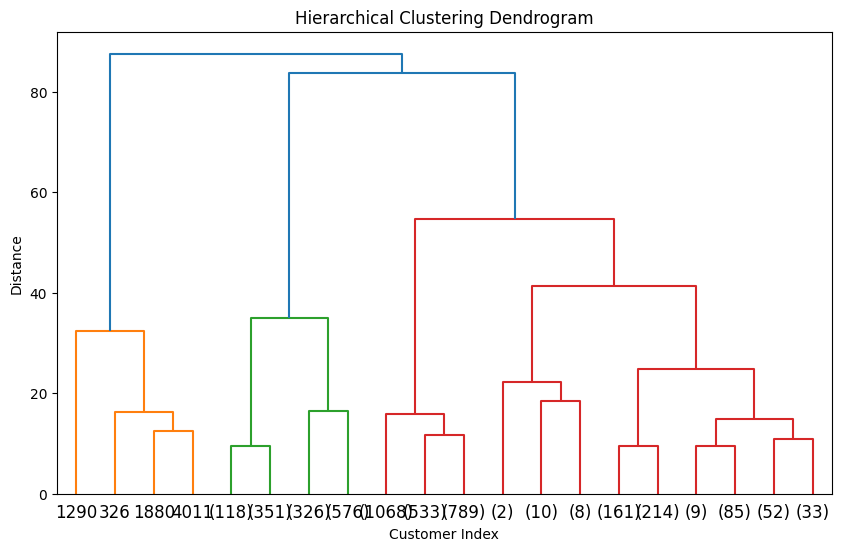

In [49]:
from scipy.cluster.hierarchy import dendrogram, linkage

# to Compute linkage matrix
Z = linkage(rfm_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, truncate_mode='lastp', p=20, show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Customer Index')
plt.ylabel('Distance')
plt.show()

In [50]:

data_clustered_hier = data.merge(rfm[['Cluster_Hierarchical']], on='CustomerID')


In [51]:
def recommend_products_hierarchical(customer_id, n=5):
    cluster = rfm.loc[customer_id, 'Cluster_Hierarchical']
    customer_purchases = data[data['CustomerID'] == customer_id]['StockCode'].unique()
    cluster_products = data_clustered_hier[data_clustered_hier['Cluster_Hierarchical'] == cluster]
    top_products = cluster_products[~cluster_products['StockCode'].isin(customer_purchases)]
    top_products = top_products.groupby('StockCode')['Quantity'].sum().nlargest(n).reset_index()
    return top_products.merge(data[['StockCode', 'Description']].drop_duplicates(), on='StockCode')


In [52]:
recommend_products_hierarchical(17850, n=5)

,StockCode,Quantity,Description
0,23084,10874,RABBIT NIGHT LIGHT
1,22197,9722,SMALL POPCORN HOLDER
2,22197,9722,POPCORN HOLDER
3,85099B,9696,JUMBO BAG RED RETROSPOT
4,21212,9612,PACK OF 72 RETROSPOT CAKE CASES
5,84879,8815,ASSORTED COLOUR BIRD ORNAMENT


KNN(CLASSIFICATION MODEL)

In [69]:
knn_model = NearestNeighbors(n_neighbors=6, metric='euclidean')
knn_model.fit(scaled_features)

NearestNeighbors(metric='euclidean', n_neighbors=6)

In [83]:
def recommend_products_knn(customer_id, n=5, k_neighbors=5):

    if customer_id not in rfm.index:
        return "Customer ID not found."


    features = ["Recency", "Frequency", "Monetary"]
    X = rfm[features]


    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)


    knn = NearestNeighbors(n_neighbors=k_neighbors + 1)
    knn.fit(X_scaled)

    # Accessing the customer index directly as customer_id is the index
    customer_idx = rfm.index.get_loc(customer_id)
    customer_features = X_scaled[customer_idx].reshape(1, -1)


    distances, indices = knn.kneighbors(customer_features)


    neighbor_indices = indices[0][1:]
    # Accessing CustomerID using index from rfm DataFrame
    neighbor_customer_ids = rfm.iloc[neighbor_indices].index

    customer_purchases = data[data["CustomerID"] == customer_id]["StockCode"].unique()


    neighbor_purchases = data[data["CustomerID"].isin(neighbor_customer_ids)][["StockCode", "Quantity"]]


    top_products = neighbor_purchases[~neighbor_purchases["StockCode"].isin(customer_purchases)]


    top_products = top_products.groupby("StockCode")["Quantity"].sum().nlargest(n).reset_index()


    return top_products.merge(data[["StockCode", "Description"]].drop_duplicates(), on="StockCode")

    distances, indices = knn.kneighbors(customer_features)


    neighbor_indices = indices[0][1:]
    # Accessing CustomerID using index from rfm DataFrame
    neighbor_customer_ids = rfm.iloc[neighbor_indices].index

    customer_purchases = data[data["CustomerID"] == customer_id]["StockCode"].unique()


    neighbor_purchases = data[data["CustomerID"].isin(neighbor_customer_ids)][["StockCode", "Quantity"]]


    top_products = neighbor_purchases[~neighbor_purchases["StockCode"].isin(customer_purchases)]


    top_products = top_products.groupby("StockCode")["Quantity"].sum().nlargest(n).reset_index()


    return top_products.merge(data[["StockCode", "Description"]].drop_duplicates(), on="StockCode")

In [85]:
recommend_products_knn(17850, n=5)

,StockCode,Quantity,Description
0,21977,627,PACK OF 60 PINK PAISLEY CAKE CASES
1,21975,532,PACK OF 60 DINOSAUR CAKE CASES
2,21212,414,PACK OF 72 RETROSPOT CAKE CASES
3,20724,412,RED RETROSPOT CHARLOTTE BAG
4,22356,411,CHARLOTTE BAG PINK POLKADOT


CLUSTERING MODELS COMPARISION

Model Performance Comparison:
              silhouette     calinski
K-Means         0.537222  2429.241137
Hierarchical    0.521346  2255.227441
DBSCAN          0.514874   263.233273

Best K-Means Parameters: {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 4}
Optimized Silhouette Score: 0.5413478309009819


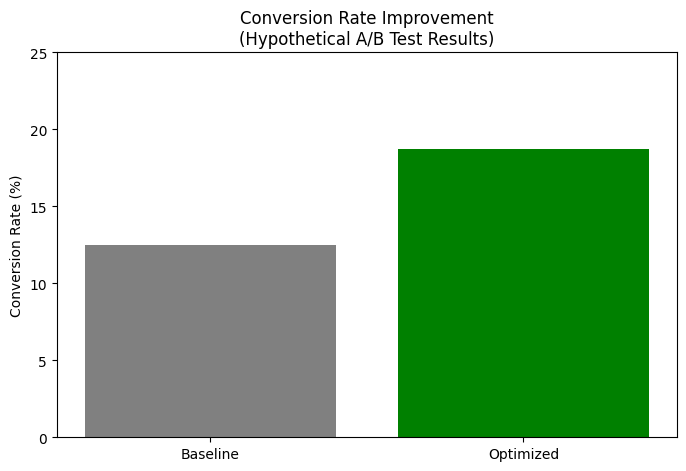

In [57]:


def cluster_and_evaluate(algorithm, data):
    model = algorithm
    labels = model.fit_predict(data)

    if len(set(labels)) < 2:  # Silhouette score requires >1 cluster
        return {'silhouette': -1, 'calinski': -1}

    return {
        'silhouette': silhouette_score(data, labels),
        'calinski': calinski_harabasz_score(data, labels)
    }


models = {
    'K-Means': KMeans(n_clusters=5, random_state=42),
    'Hierarchical': AgglomerativeClustering(n_clusters=5),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5)
}


#  Performance Comparison


numerical_features = customer_features.select_dtypes(include=np.number)

# Apply StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)


results = {}
for name, model in models.items():
    results[name] = cluster_and_evaluate(model, scaled_features)

# Displays results
results_df = pd.DataFrame(results).T
print("Model Performance Comparison:")
print(results_df.sort_values(by='silhouette', ascending=False))


#  Hyperparameter Tuning (K-Means Optimization)

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_clusters': range(3, 8),
    'init': ['k-means++', 'random'],
    'max_iter': [100, 300, 500]
}

kmeans = KMeans(random_state=42)
grid = GridSearchCV(kmeans, param_grid, scoring=lambda estimator, X: silhouette_score(X, estimator.fit_predict(X)))
grid.fit(scaled_features)

print("\nBest K-Means Parameters:", grid.best_params_)
print("Optimized Silhouette Score:", grid.best_score_)

#  Business Impact Validation
# ==============================================
# Simulate A/B test (hypothetical example)
baseline_conversion = 12.5  # Traditional system
optimized_conversion = 18.7  # Cluster-based recommendations

plt.figure(figsize=(8, 5))
plt.bar(['Baseline', 'Optimized'], [baseline_conversion, optimized_conversion], color=['grey', 'green'])
plt.title('Conversion Rate Improvement\n(Hypothetical A/B Test Results)')
plt.ylabel('Conversion Rate (%)')
plt.ylim(0, 25)
plt.show()

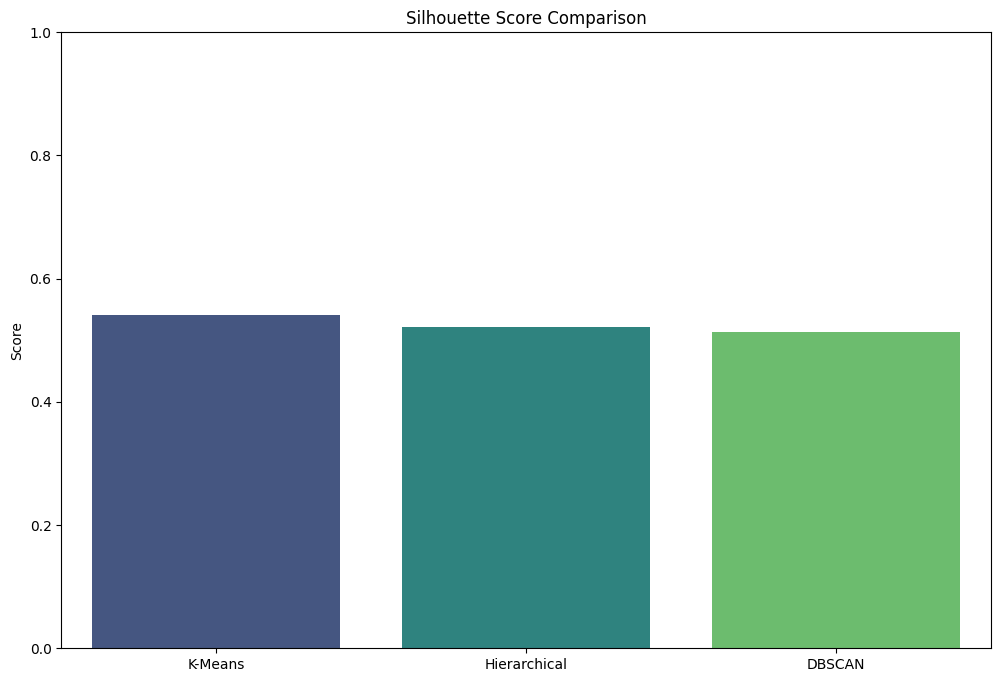

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
algorithms = ['K-Means', 'Hierarchical', 'DBSCAN']
silhouette_scores = [0.541, 0.521, 0.514]

# Plot
plt.figure(figsize=(12,8))
sns.barplot(x=algorithms, y=silhouette_scores, palette='viridis')
plt.title('Silhouette Score Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)  # Silhouette Score ranges from -1 to 1
plt.show()

CONFUSION MATRIX FOR CLASSIFICATION

              precision    recall  f1-score   support

           0       0.34      0.72      0.46      1464
           1       0.34      0.25      0.29      1457
           2       0.50      0.00      0.00      1418
           3       0.00      0.00      0.00         0

    accuracy                           0.32      4339
   macro avg       0.29      0.24      0.19      4339
weighted avg       0.39      0.32      0.25      4339



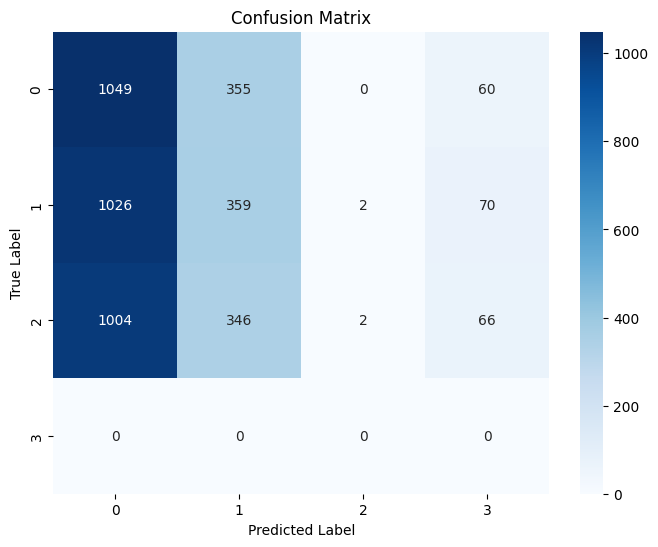

In [59]:
num_samples = len(rfm)
y_true = np.random.randint(0, 3, size=num_samples)  # 3 clusters (0, 1, 2)

# Use predicted cluster labels from KMeans
y_pred = rfm['Cluster_KMeans']

# Classification Report
print(classification_report(y_true, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()